Q135. Write a pandas program to generate sequences of fixed- frequency dates and time spans.

In [3]:
import pandas as pd
dtr = pd.date_range('2018-01-01', periods=12, freq='H')
print("Hourly frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='min')
print("\nMinutely frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='S')
print("\nSecondly frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='2H')
print("nMultiple Hourly frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='5min')
print("\nMultiple Minutely frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='BQ')
print("\nMultiple Secondly frequency:") 
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='w')
print("\nWeekly frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='2h20min')
print("\nCombine together day and intraday offsets-1:")
print(dtr) 
dtr = pd.date_range('2018-01-01', periods=12, freq='1D10U')
print("\nCombine together day and intraday offsets-2:")
print(dtr)

Hourly frequency:
DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               '2018-01-01 10:00:00', '2018-01-01 11:00:00'],
              dtype='datetime64[ns]', freq='H')

Minutely frequency:
DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:01:00',
               '2018-01-01 00:02:00', '2018-01-01 00:03:00',
               '2018-01-01 00:04:00', '2018-01-01 00:05:00',
               '2018-01-01 00:06:00', '2018-01-01 00:07:00',
               '2018-01-01 00:08:00', '2018-01-01 00:09:00',
               '2018-01-01 00:10:00', '2018-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

Secondly frequency:
DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01

Q136. Write a pandas program to manipulate and convert date times with timezone information.

In [4]:
import pandas as pd
dtt = pd.date_range('2018-01-01', periods=3, freq='H') 
dtt = dtt.tz_localize('UTC')
print(dtt)
print("\nFrom UTC to America/Los_Angeles:") 
dtt = dtt.tz_convert('America/Los_Angeles')
print(dtt)

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 01:00:00+00:00',
               '2018-01-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

From UTC to America/Los_Angeles:
DatetimeIndex(['2017-12-31 16:00:00-08:00', '2017-12-31 17:00:00-08:00',
               '2017-12-31 18:00:00-08:00'],
              dtype='datetime64[ns, America/Los_Angeles]', freq='H')


Q137. Write a pandas program to create the graphical analysis of UFO (unidentified flying object) Sightings year.

C:\Users\nisdash\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  # This is added back by InteractiveShellApp.init_path()


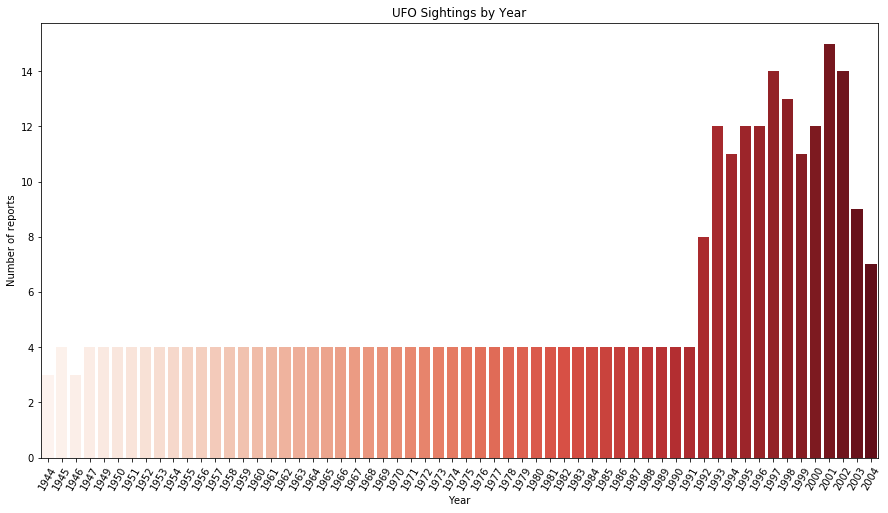

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
df = pd.read_csv(r'ufo.csv')
df['Date_time'] = df['Date_time'].astype('datetime64[ns]')
df["ufo_yr"] = df.Date_time.dt.year 
years_data = df.ufo_yr.value_counts()
years_index = years_data.index 
# x ticks 
years_values = years_data.get_values()
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60) 
plt.title('UFO Sightings by Year')
plt.xlabel("Year")
plt.ylabel("Number of reports") 
years_plot = sns.barplot(x=years_index[:60],y=years_values[:60], palette = "Reds")

Q138. Write a pandas program to create a comparison of the top 10 years in which the (UFO) was sighted VS each Month.


Heatmap for comparison of the top 10 years in which the UFO was sighted vs each month:


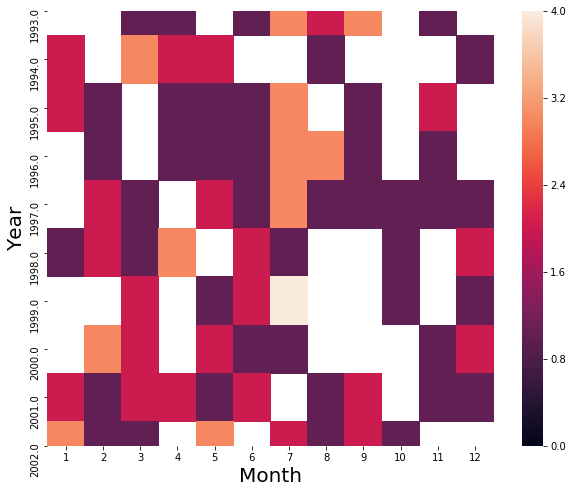

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Source: https://bit.ly/1l9yjm9
df = pd.read_csv(r'ufo.csv')
df['Date_time'] = df['Date_time'].astype('datetime64[ns]')
most_sightings_years = df['Date_time'].dt.year.value_counts().head(10)
def is_top_years(year):
   if year in most_sightings_years.index:
       return year
month_vs_year = df.pivot_table(columns=df['Date_time'].dt.month,index=df['Date_time'].dt.year.apply(is_top_years),aggfunc='count',values='city')
month_vs_year.columns = month_vs_year.columns.astype(int)
print("\nHeatmap for comparison of the top 10 years in which the UFO was sighted vs each month:")
plt.figure(figsize=(10,8))
ax = sns.heatmap(month_vs_year, vmin=0, vmax=4)
ax.set_xlabel('Month').set_size(20)
ax.set_ylabel('Year').set_size(20)

Q139. Write a pandas program to create a heatmap (rectangular data as a colour-encoded matrix) for comparison of top 10 years in which (UFO ) was sighted VS each Month.


Heatmap for comparison of the top 10 years in which the UFO was sighted vs each month:


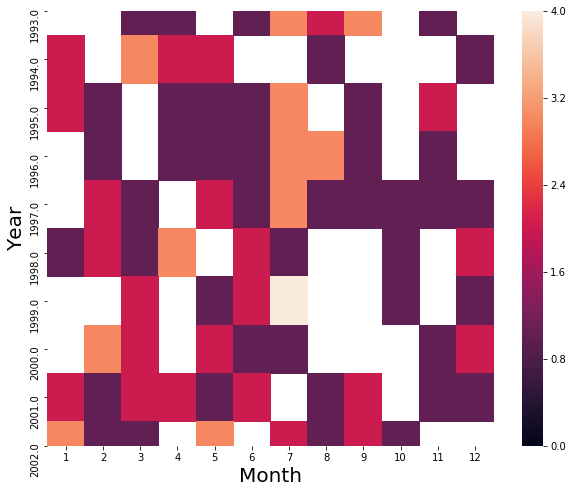

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Source: https://bit.ly/1l9yjm9
df = pd.read_csv(r'ufo.csv')
df['Date_time'] = df['Date_time'].astype('datetime64[ns]') 
most_sightings_years = df['Date_time'].dt.year.value_counts().head(10)
def is_top_years(year):
    if year in most_sightings_years.index:
        return year
month_vs_year = df.pivot_table(columns=df['Date_time'].dt.month,index=df['Date_time'].dt.year.apply(is_top_years),aggfunc='count',values='city')
month_vs_year.columns = month_vs_year.columns.astype(int)
print("\nHeatmap for comparison of the top 10 years in which the UFO was sighted vs each month:")
plt.figure(figsize=(10,8))
ax = sns.heatmap(month_vs_year, vmin=0, vmax=4)
ax.set_xlabel('Month').set_size(20) 
ax.set_ylabel('Year').set_size(20)
    

Q140. Write a pandas program to create a Timewheel of Hour VS Year comparison of the top 10 years in which the (UFO) was sighted.


Comparison of the top 10 years in which the UFO was sighted vs each month:


C:\Users\nisdash\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


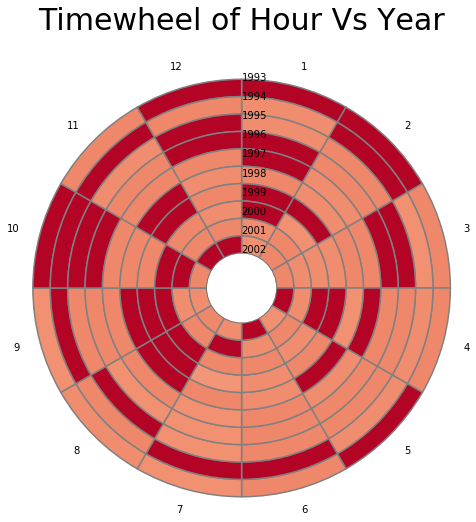

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
#Source: https://bit.ly/2XDY2XN
df = pd.read_csv(r'ufo.csv')
df['Date_time'] = df['Date_time'].astype('datetime64[ns]')
most_sightings_years = df['Date_time'].dt.year.value_counts().head(10)
def is_top_years(year):
   if year in most_sightings_years.index:
       return year
month_vs_year = df.pivot_table(columns=df['Date_time'].dt.month,index=df['Date_time'].dt.year.apply(is_top_years),aggfunc='count',values='city')
month_vs_year.index = month_vs_year.index.astype(int)
month_vs_year.columns = month_vs_year.columns.astype(int)
print("\nComparison of the top 10 years in which the UFO was sighted vs each month:")
def pie_heatmap(table, cmap='coolwarm_r', vmin=None, vmax=None,inner_r=0.25, pie_args={}):
   n, m = table.shape
   vmin= table.min().min() if vmin is None else vmin
   vmax= table.max().max() if vmax is None else vmax

   centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
   plt.gcf().gca().add_artist(centre_circle)
   norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
   cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)

   for i, (row_name, row) in enumerate(table.iterrows()):
       labels = None if i > 0 else table.columns
       wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values],
           labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
       plt.setp(wedges[0], edgecolor='grey',linewidth=1.5)
       wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
       plt.setp(wedges[0], edgecolor='grey',linewidth=1.5)
plt.figure(figsize=(8,8))
plt.title("Timewheel of Hour Vs Year",y=1.08,fontsize=30)
pie_heatmap(month_vs_year, vmin=-20,vmax=80,inner_r=0.2)


Q141. Write a python program to draw the line using given axis values with the suitable label in the x-axis, y-axis, and a title.

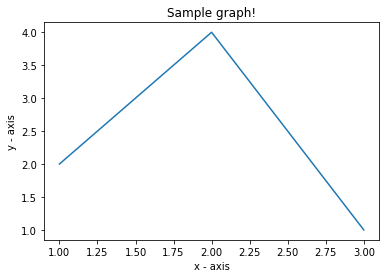

In [25]:
import matplotlib.pyplot as plt
# x axis values
x = [1,2,3]
# y axis values
y = [2,4,1]
# Plot lines and/or markers to the Axes.
plt.plot(x, y)
# Set the x axis label of the current axis.
plt.xlabel('x - axis')
# Set the y axis label of the current axis. 
plt.ylabel('y - axis')
# Set a title 
plt.title('Sample graph!')
# Display a figure. 
plt.show()

Q142. Write a python program to draw the line charts of the financial data of the Alphabet Inc., between October.

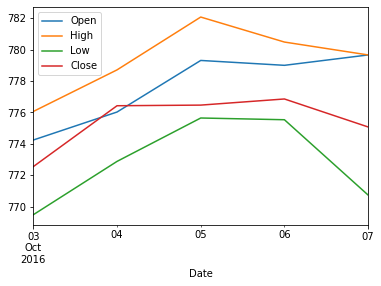

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('fdata.csv', sep=',', parse_dates=True, index_col=0)
df.plot()
plt.show()

Q143. Write a Python program to plot two or more lines on same plot with the suitable legends of each line.

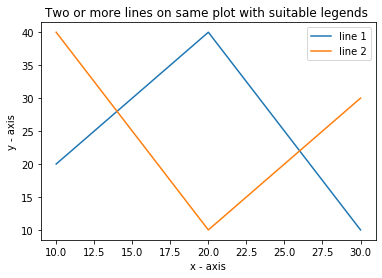

In [30]:
import matplotlib.pyplot as plt
# line 1 points
x1 = [10,20,30]
y1 = [20,40,10]
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")
# line 2 points 
x2 = [10,20,30] 
y2 = [40,10,30]
# plotting the line 2 points 
plt.plot(x2, y2, label = "line 2")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes. 
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot 
plt.legend()
# Display a figure.
plt.show()

Q144. Write a python programming to display a bar chart of the popularity of programming languages.

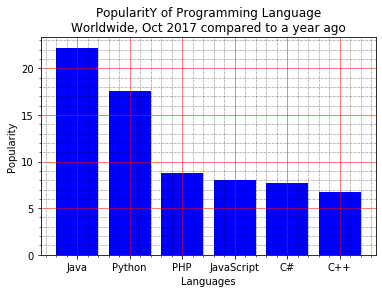

In [31]:
import matplotlib.pyplot as plt
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, popularity, color='blue')
plt.xlabel("Languages")
plt.ylabel("Popularity")

plt.title("PopularitY of Programming Language\n" + "Worldwide, Oct 2017 compared to a year ago")
plt.xticks(x_pos, x)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Q145. Write a python programming to display a horizontal bar chart of the popularity of programming languages.

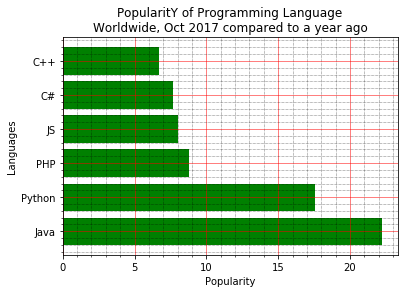

In [32]:
import matplotlib.pyplot as plt
x = ['Java', 'Python', 'PHP', 'JS', 'C#', 'C++'] 
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7] 
x_pos = [i for i, _ in enumerate(x)]
plt.barh(x_pos, popularity, color='green')
plt.xlabel("Popularity")
plt.ylabel("Languages") 
plt.title("PopularitY of Programming Language\n" + "Worldwide, Oct 2017 compared to a year ago")
plt.yticks(x_pos, x)
# Turn on the grid 
plt.minorticks_on() 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid 
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Q146. Write a python programming to display a bar chart of the Popularity of programming languages. Increase bottom margin.

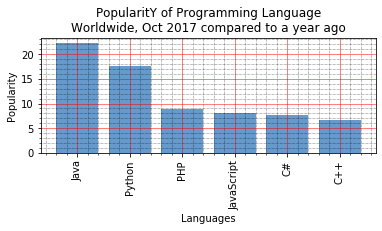

In [33]:
import matplotlib.pyplot as plt
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, popularity, color=(0.4, 0.6, 0.8, 1.0)) 
plt.xlabel("Languages")
plt.ylabel("Popularity")
plt.title("PopularitY of Programming Language\n" + "Worldwide, Oct 2017 compared to a year ago")
# Rotation of the bars names 
plt.xticks(x_pos, x, rotation=90)
# Custom the subplot layout 
plt.subplots_adjust(bottom=0.4, top=.8)
# Turn on the grid 
plt.minorticks_on() 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid 
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Q147. Write a python program to create the bar plot from a DataFrame.

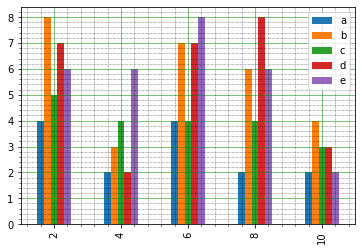

In [34]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
a=np.array([[4,8,5,7,6],[2,3,4,2,6],[4,7,4,7,8],[2,6,4,8,6],[2,4,3,3,2]])
df=DataFrame(a, columns=['a','b','c','d','e'], index=[2,4,6,8,10])
df.plot(kind='bar')
# Turn on the grid 
plt.minorticks_on() 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Q148. Write a python program to draw the scatter plot comparing two subject marks of Mathematics and Science. Use marks of 10 students.

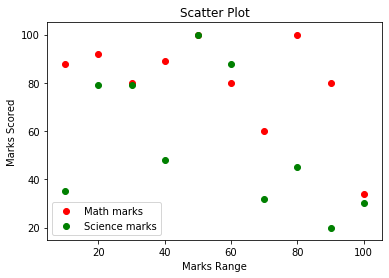

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
math_marks = [88, 92, 80, 89, 100, 80, 60, 100, 80, 34] 
science_marks = [35, 79, 79, 48, 100, 88, 32, 45, 20, 30]
marks_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.scatter(marks_range, math_marks, label='Math marks', color='r') 
plt.scatter(marks_range, science_marks, label='Science marks', color='g')
plt.title('Scatter Plot') 
plt.xlabel('Marks Range')
plt.ylabel('Marks Scored')
plt.legend()
plt.show()

Q149. Write a python program to draw the scatter plot for three different groups comparing weights and heights.

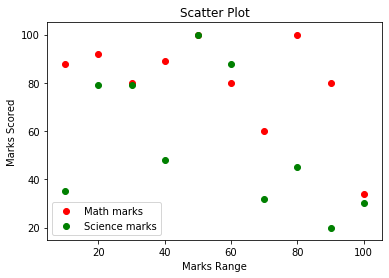

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
math_marks = [88, 92, 80, 89, 100, 80, 60, 100, 80, 34]
science_marks = [35, 79, 79, 48, 100, 88, 32, 45, 20, 30]
marks_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.scatter(marks_range, math_marks, label='Math marks', color='r')
plt.scatter(marks_range, science_marks, label='Science marks', color='g')
plt.title('Scatter Plot')
plt.xlabel('Marks Range')
plt.ylabel('Marks Scored')
plt.legend()
plt.show()

Q150. Write a python program to draw a scatter plot to find sea-level rise in past 100 years.

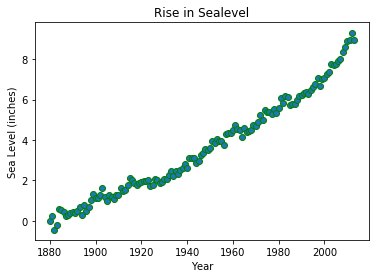

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('data.csv')
year = data['year']
sea_levels = data['CSIRO_sea_level']
plt.scatter(year, sea_levels, edgecolors='g')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sealevel')
plt.show()